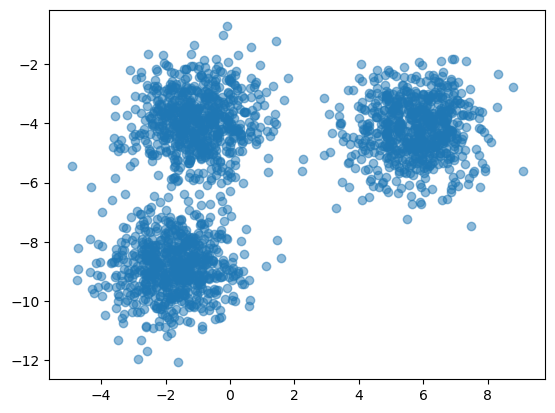

In [1]:
# 1): Random Centriods
# 2): Label data points to a specific cluster
# 3): Recalculated the new Centroids

# Repeat 2)-3) if the new centroid have changed postions
# Stop when centroids remain the same

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

center = 3 
X , y = make_blobs( n_samples =2000 , centers =center, cluster_std = 1  , random_state=40)
plt.scatter(X[:,0], X[:, 1], alpha =0.5 )

In [2]:
X


array([[  0.84213168,  -3.41270913],
       [  5.45152463,  -5.3618598 ],
       [  6.29790142,  -5.13555172],
       ...,
       [  6.45367865,  -3.02856521],
       [  4.87901782,  -4.45345336],
       [ -2.85963917, -11.9599577 ]])

In [3]:
# 1): Random Centriods
K = 3

C_x = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = K)
C_x

array([-2,  2,  8])

In [4]:
C_y = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = K)
C_y

array([-11,  -1,  -6])

In [5]:
Centriods = np.zeros((3,2))
Centriods

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
Centriods[:,0] = C_x
Centriods[:,1] = C_y
Centriods

array([[ -2., -11.],
       [  2.,  -1.],
       [  8.,  -6.]])

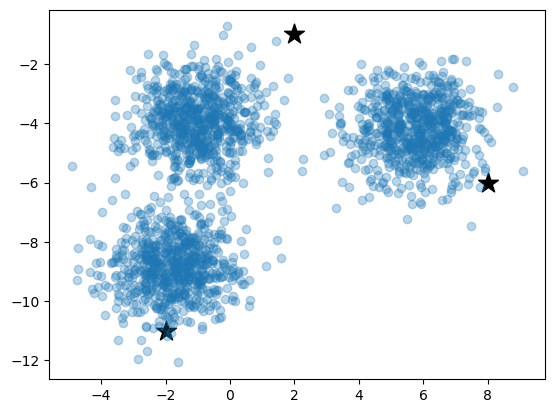

In [7]:
# plot Centriods
plt.scatter(Centriods[:,0], Centriods[:,1], marker = '*', color = 'black', s = 222)
plt.scatter(X[:,0], X[:, 1], alpha =0.3 )

In [8]:
# 2): Label data points to a specific cluster

cluster_label = np.zeros(len(X))
cluster_label

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
# func for calculate distance between two points

def dist(x,y):
    if x.ndim == y.ndim :
        return np.sqrt(np.sum((x-y)**2))
    if x.ndim ==1 and y.ndim!=1 :
        z=[]
        for i in range(len(y)):
            a = np.sqrt(np.sum((x-y[i])**2))
            z.append(a)
        return z

In [10]:
len(X)

2000

In [11]:
for i in range(len(X)):
    distance = dist(X[i,:], Centriods)
    cluster = np.argmin(distance)
    cluster_label[i] = cluster
print(cluster_label[:100])

[1. 2. 2. 0. 2. 1. 1. 0. 2. 0. 0. 1. 2. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 2. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 2. 2. 0. 2. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 2. 1. 2. 2. 1. 0. 0. 0. 2. 1. 0. 0. 1. 2.
 2. 0. 1. 1. 2. 0. 1. 2. 1. 0. 2. 2. 1. 1. 0. 0. 0. 2. 2. 1. 0. 2. 2. 1.
 2. 0. 1. 2.]


In [12]:
dist(X[1,:], Centriods)

[9.344187724973638, 5.562269605560994, 2.627156187204494]

In [13]:
np.argmin(dist(X[1,:], Centriods))

2

In [14]:
for i in range(K) :
    print(f"cluster_label {i} : {(cluster_label==i).sum()}")                 

cluster_label 0 : 704
cluster_label 1 : 729
cluster_label 2 : 567


In [15]:
points0 = np.array([X[j] for j in range(len(X)) if cluster_label[j] == 0])
points0

array([[ -1.63192637,  -8.59477969],
       [ -1.24266315,  -8.63401446],
       [ -2.95385639,  -7.80366104],
       ...,
       [ -0.51152245,  -7.75018805],
       [ -1.22560868,  -7.87760479],
       [ -2.85963917, -11.9599577 ]])

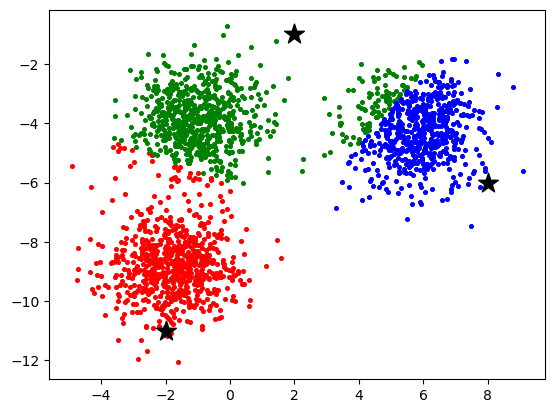

In [16]:
# Label data points to a specific cluster
colors = ['red', 'green', 'blue']

for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
plt.scatter(Centriods[:,0], Centriods[:,1], marker = '*', color = 'black', s = 222)

In [17]:
# 3): Recalculated the new Centroids
C_old = Centriods.copy()
C_old

array([[ -2., -11.],
       [  2.,  -1.],
       [  8.,  -6.]])

In [18]:
for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    Centriods[i] = np.mean(points, axis=0)
Centriods

array([[-1.78387483, -8.67830088],
       [-0.22363779, -3.74877902],
       [ 5.9605173 , -4.34991189]])

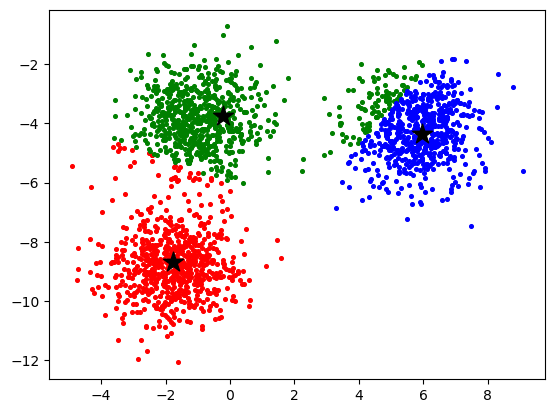

In [19]:
# plot new Centroids
colors = ['red', 'green', 'blue']

for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
plt.scatter(Centriods[:,0], Centriods[:,1], marker = '*', color = 'black', s = 222)

In [20]:
error = dist(Centriods, C_old)
error

4.981930196984044

In [21]:
# Repeat 2)-3) if the new centroid have changed postions
# Stop when centroids remain the same (error=0)

cluster_label = np.zeros(len(X))
for i in range(len(X)):
    distance = dist(X[i,:], Centriods)
    cluster = np.argmin(distance)
    cluster_label[i] = cluster
print(cluster_label[:100])

[1. 2. 2. 0. 2. 1. 1. 0. 2. 0. 0. 1. 2. 1. 0. 0. 2. 0. 1. 1. 1. 1. 0. 1.
 0. 2. 1. 1. 1. 0. 1. 0. 0. 2. 0. 2. 1. 0. 0. 1. 0. 2. 2. 0. 2. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 2. 1. 0. 2. 2. 2. 2. 2. 1. 0. 1. 0. 2. 1. 0. 0. 1. 2.
 2. 0. 1. 1. 2. 0. 1. 2. 1. 0. 2. 2. 1. 1. 0. 0. 0. 2. 2. 1. 0. 2. 2. 1.
 2. 1. 1. 2.]


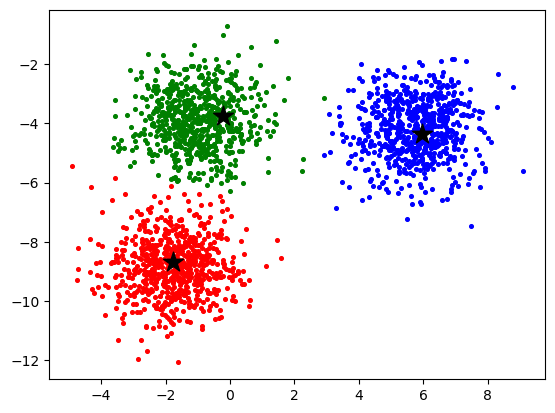

In [22]:
colors = ['red', 'green', 'blue']

for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
plt.scatter(Centriods[:,0], Centriods[:,1], marker = '*', color = 'black', s = 222)

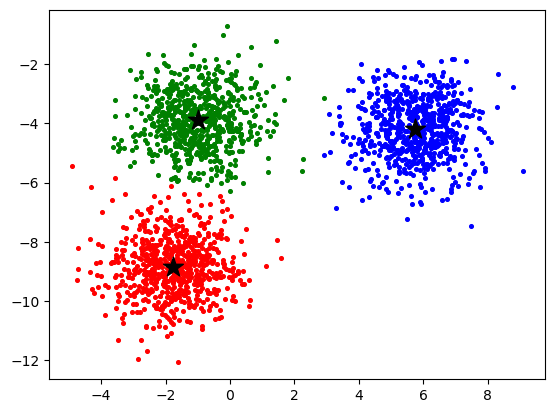

In [23]:
C_old = Centriods.copy()
for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    Centriods[i] = np.mean(points, axis=0)
colors = ['red', 'green', 'blue']

for i in range(K):
    points = []
    points = np.array([X[j] for j in range(len(X)) if cluster_label[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
plt.scatter(Centriods[:,0], Centriods[:,1], marker = '*', color = 'black', s = 222)

In [24]:
#Decreasing error which means that we are getting the better clusters
error = dist(Centriods, C_old)
error

0.8551428443983495